<a href="https://colab.research.google.com/github/Kritikadewan/Mini_Project/blob/main/Bi-LSTM_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,InputLayer
from sklearn.model_selection import train_test_split

In [5]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [6]:
import os
os.getcwd()

'/content'

In [9]:
data_path  = "/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv"

twitter_data = pd.read_csv(data_path,names=['target','id','date','flag','user','text'], dtype=object, encoding = "ISO-8859-1")

In [47]:
twitter_data['target'] = twitter_data['target'].astype('float64') 


In [48]:
X=np.array(twitter_data['text'])
Y=np.array(twitter_data['target'])

# Set Y=1 for Positive Tweets
Y[Y==4]=1

In [49]:
index = 1250  # index in range [0,1599999]

print(X[index])

@Weebeedee run was great thanks. Is very windy today so bike ride not an option this morning 


In [50]:

def tokenize(X):
  
  #Tokenize the data using nltk
  
  
  treebank = nltk.tokenize.TreebankWordTokenizer()
  X_tokenized=[treebank.tokenize(sentence) for sentence in X]  
  return X_tokenized
  


def remove_stopwords(X):
  
  #Remove Stopwords using nltk
  

  stopwords=nltk.corpus.stopwords.words('english') + ['@']
  X_without_stopwords = []

  for sentence in X:

    temp = [word for word in sentence if not word in stopwords]
    X_without_stopwords.append(temp) 

  return X_without_stopwords


def stem(X,type='porter'):
  
  #Perform Stemming using nltk
  #type = 'Porter','Snowball','Lancaster'
  
  
  if type == 'porter':
    stemmer= nltk.stem.PorterStemmer()
  elif type == 'snowball':
    stemmer = nltk.stem.SnowballStemmer()
  elif type == 'lancaster':
    stemmer = nltk.stem.LancasterStemmer()    

  
  X_stemmed = []

  for sentence in X:

    temp = [stemmer.stem(word) for word in sentence]
    X_stemmed.append(temp)

  return X_stemmed 



def get_wordnet_pos(treebank_tag):
        
        #return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        
        if treebank_tag.startswith('J'):
            return 'a'
        elif treebank_tag.startswith('V'):
            return 'v'
        elif treebank_tag.startswith('N'):
            return 'n'
        elif treebank_tag.startswith('R'):
            return 'r'
        else:
            return 'n'


def lemmatize(X):
  
  #Lemmatize words using corresponding POS tag
  

  lemmatizer = nltk.stem.WordNetLemmatizer()
  
  X_pos = []
  X_lemmatized = []

  for sentence in X :

    temp = nltk.pos_tag(sentence)
    X_pos.append(temp)  

  for sentence in X_pos :

    temp = [ lemmatizer.lemmatize(word[0],pos=get_wordnet_pos(word[1])) for word in sentence]
    X_lemmatized.append(temp)  

  return X_lemmatized


In [51]:
# Preprocess the data

X_tokenized = tokenize(X)

In [52]:
X_without_stopwords = remove_stopwords ( X_tokenized )



In [ ]:
X_lemmatized = lemmatize ( X_without_stopwords )

In [16]:
X_clean = []

for sentence in X_lemmatized:

  temp = " ".join(sentence)
  X_clean.append(temp)

In [17]:
# Count total no. of distinct tokens

tokenizer = Tokenizer(filters='@')
tokenizer.fit_on_texts(X_clean)

print('No. of distinct tokens = '+str(len(tokenizer.word_index)))


No. of distinct tokens = 837032


In [18]:
max_vocab=50000


In [19]:
# Reload Twitter dataset with new Vocabulary

tokenizer = Tokenizer(num_words=max_vocab,filters='@')
tokenizer.fit_on_texts(X_clean)

In [20]:
X_clean_vectorized=tokenizer.texts_to_sequences(X_clean)


In [21]:
length=[]
for sentence in X_clean_vectorized:
  length.append(len(sentence))
  
print('Average length of tweets = '+str(np.mean(length)))

Average length of tweets = 10.064181875


In [22]:
max_length=20


In [23]:
X_clean_pad = keras.preprocessing.sequence.pad_sequences(X_clean_vectorized,max_length,padding='post',
                                                         truncating='post')

print(X_clean_pad.shape)

(1600000, 20)


In [24]:
index  = 1260  # index in range [0,1599999]

print('\nOriginal :')
print(X[index])
print('\nTokenized :')
print(X_tokenized[index])
print('\nStopwords removed :')
print(X_without_stopwords[index])
print('\nPOS tagged :')
print(nltk.pos_tag(X_without_stopwords[index]))
print('\nLemmatized :')
print(X_lemmatized[index])
print('\nClean :')
print(X_clean[index])
print('\nVectorized :')
print(X_clean_vectorized[index])
print('\nPadded :')
print(X_clean_pad[index])



Original :
in the university, in the classroom, on the computer... shit my day is boring 

Tokenized :
['in', 'the', 'university', ',', 'in', 'the', 'classroom', ',', 'on', 'the', 'computer', '...', 'shit', 'my', 'day', 'is', 'boring']

Stopwords removed :
['university', ',', 'classroom', ',', 'computer', '...', 'shit', 'day', 'boring']

POS tagged :
[('university', 'NN'), (',', ','), ('classroom', 'NN'), (',', ','), ('computer', 'NN'), ('...', ':'), ('shit', 'JJ'), ('day', 'NN'), ('boring', 'VBG')]

Lemmatized :
['university', ',', 'classroom', ',', 'computer', '...', 'shit', 'day', 'bore']

Clean :
university , classroom , computer ... shit day bore

Vectorized :
[3005, 3, 7079, 3, 414, 5, 335, 16, 282]

Padded :
[3005    3 7079    3  414    5  335   16  282    0    0    0    0    0
    0    0    0    0    0    0]


In [25]:
embedding_path = '/content/drive/MyDrive/Colab Notebooks/glove.twitter.27B.100d.txt'

embeddings_index = dict()
f = open(embedding_path)
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()


In [26]:
# Create Word Embedding Matrix

embedding_matrix = np.zeros((max_vocab, 100))
for i in range(1,max_vocab):
	embedding_vector = embeddings_index.get(tokenizer.index_word[i])
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [38]:
np.random.seed(1260)

model_2 = keras.models.Sequential(name='Model_2')

model_2.add(InputLayer(input_shape=(20,),name='Integer_Encoding_after_Preprocessing'))
model_2.add(Embedding(max_vocab, 100, weights=[embedding_matrix], input_length=max_length,mask_zero=True,
                      name='Pretrained_GloVe_100D', trainable=False))
model_2.add(Bidirectional(LSTM(64,name='LSTM'),name='Bidirectional_RNN'))
model_2.add(Dropout(0.5,name='Regularizer'))
model_2.add(Dense(1, activation='sigmoid',name='Sigmoid_Classifier'))

In [39]:
from tensorflow.python.keras.optimizers import Adam
model_2.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Pretrained_GloVe_100D (Embed (None, 20, 100)           5000000   
_________________________________________________________________
Bidirectional_RNN (Bidirecti (None, 128)               84480     
_________________________________________________________________
Regularizer (Dropout)        (None, 128)               0         
_________________________________________________________________
Sigmoid_Classifier (Dense)   (None, 1)                 129       
Total params: 5,084,609
Trainable params: 84,609
Non-trainable params: 5,000,000
_________________________________________________________________


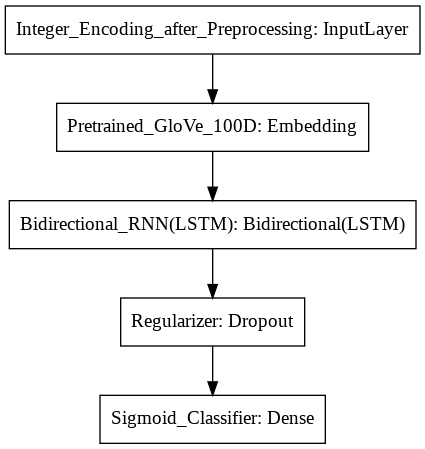

In [40]:
model_2.summary()
keras.utils.plot_model(model_2,to_file='model_2.png')

In [54]:
np.random.seed(1260)

X_train, X_test, Y_train, Y_test = train_test_split (X_clean_pad,Y.reshape(Y.shape[0],1),test_size=0.05)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1520000, 20)
(80000, 20)
(1520000, 1)
(80000, 1)


In [55]:
history = model_2.fit(X_train,Y_train,batch_size=1024,epochs=15,validation_split=0.05, verbose = 1)

Epoch 1/15
1411/1411 [==============================] - 596s 423ms/step - loss: 0.4900 - accuracy: 0.7593 - val_loss: 0.4565 - val_accuracy: 0.7799
Epoch 2/15
1411/1411 [==============================] - 608s 431ms/step - loss: 0.4556 - accuracy: 0.7832 - val_loss: 0.4430 - val_accuracy: 0.7890
Epoch 3/15
1411/1411 [==============================] - 583s 413ms/step - loss: 0.4447 - accuracy: 0.7900 - val_loss: 0.4354 - val_accuracy: 0.7939
Epoch 4/15
1411/1411 [==============================] - 516s 366ms/step - loss: 0.4376 - accuracy: 0.7943 - val_loss: 0.4354 - val_accuracy: 0.7950
Epoch 5/15
1411/1411 [==============================] - 518s 367ms/step - loss: 0.4322 - accuracy: 0.7974 - val_loss: 0.4275 - val_accuracy: 0.7995
Epoch 6/15
1411/1411 [==============================] - 509s 361ms/step - loss: 0.4282 - accuracy: 0.7999 - val_loss: 0.4256 - val_accuracy: 0.8003
Epoch 7/15
1411/1411 [==============================] - 509s 361ms/step - loss: 0.4247 - accuracy: 0.8022 - val_

In [56]:
model_2.evaluate(X_test,Y_test)


2500/2500 [==============================] - 21s 8ms/step - loss: 0.4196 - accuracy: 0.8047


[0.4196469783782959, 0.8047249913215637]